**Supply Chain Management**

**Objective**



*Optimize the supply quantity in each and every warehouse in the entire country.for that build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.*




**Expected Outcome**

*To build a model which will optimize the supply quantity of instant noodles in each and every warehouse in the entire country. It may be a regression 
model with least mean square error and high coefficient of determinaton (r square)*

**Data Collection and Preprocessing**

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from scipy.stats import zscore

In [2]:
#Reading the train and test data set

data_train=pd.read_csv(r"C:\Users\anudh\Downloads\supply_train.csv")
data_test=pd.read_csv(r"C:\Users\anudh\Downloads\supply_test.csv")

data_train

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [3]:
data_train.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
data_test.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


**About Dataset**


**Ware_house_ID**-Unique Warehouse id where product isprepared for dispatch.dtype: Object

**WH_Manager_ID**- Manager Id present in the warehousedtype: Object

**zone**-Zone of the Warehouse, dtype: String`

**WH_regional_zone**-  Regional Zone of the warehouse, dtype:Object

**num_refill_req_l3m**-  Refilling request received by the warehouse in the last 3 months, dtype: integer.

**transport_issue_l1y**-  No. of transport issued for warehouse in last 1 year, dtype: integer.

**Competitor_in_mkt**- No. of competitors in the market, dtype:integer

**retail_shop_num**- Number of retail shops who sell noodles produced by the warehouse, dtype: integer.

**wh_owner_type**- The warehouse is owned by the company or it is on rent, dtype: String.

**distributor_num**- No. of distributor who works between warehouse and retail shops, dtype: integer.

**flood_impacted**-  Is the warehouse in a flood impacted area or not, dtype: integer.

**flood_proof**-  Flood_proof: Warehouse is having flood proof indicator, dtype: integer

**electric_supply**-  Does the warehouse have proper electric supply along with some power backup, dtype: integer

**dist_from_hub**- distance from the warehouse to production

**workers_num**-  no. workers in the warehouse, dtype: integer.

**wh_est_year**- warehouse establishment year, dtype: integer

**storage_issue_reported_l3m**- storage issues reported by the warehouse in the last 3months.

**temp_reg_mach**-  warehouse having temperature regulating machine indicator or not, dtype: integer.

**approved_wh_govt_certificate**- Type of approval warehouse having been issued by government, dtype: Object.

**wh_breakdown_l3m**- Number of times the warehouse faces the breakdown in the last 3 months, dtype integer.

**product_wg_ton**-  Product weight, dtype: integer.


In [5]:
#checking information of data_train

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

Train data set has 25 columns and 16620 rows of which 15 integer,8 string and 2 float data type.

In [6]:
#checking information of data_test

data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

Test data set has 25 columns and 5529 rows of which 15 integer,8 string and 2 float data type.

In [7]:
data_train.describe(include = 'all')

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620,16620,16620,16620,16620,16620,16620.000000,16620.000000,16620.000000,...,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16021,16620.000000,16620.000000,16620.000000
unique,NaN,16620,16620,2,3,4,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,WH_100000,EID_50000,Rural,Large,North,Zone 6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
freq,NaN,1,1,15272,6743,6800,5568,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3638,NaN,NaN,NaN
mean,8309.500000,NaN,NaN,NaN,NaN,NaN,NaN,4.126655,0.780927,3.103129,...,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,NaN,3.491095,18.727377,22098.420096
std,4797.925072,NaN,NaN,NaN,NaN,NaN,NaN,2.606241,1.206351,1.147711,...,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,NaN,1.688614,8.619857,11620.337346
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,NaN,0.000000,1.000000,2093.000000
25%,4154.750000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,2.000000,...,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,NaN,2.000000,11.000000,13057.000000
50%,8309.500000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,3.000000,...,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,NaN,3.000000,19.000000,22099.000000
75%,12464.250000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,4.000000,...,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,NaN,5.000000,26.000000,30103.000000


In [8]:
data_test.describe(include='all')

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529,5529,5529,5529,5529,5529,5529.000000,5529.000000,5529.000000,...,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5323,5529.000000,5529.000000,5529.000000
unique,NaN,5529,5529,2,3,4,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,WH_116621,EID_66621,Rural,Large,North,Zone 6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
freq,NaN,1,1,5061,2225,2269,1807,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1220,NaN,NaN,NaN
mean,19385.00000,NaN,NaN,NaN,NaN,NaN,NaN,4.007235,0.765600,3.106167,...,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,NaN,3.477302,18.892205,22052.334599
std,1596.22915,NaN,NaN,NaN,NaN,NaN,NaN,2.604325,1.187567,1.128396,...,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,NaN,1.700717,8.716737,11645.738485
min,16621.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,...,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,NaN,0.000000,1.000000,2065.000000
25%,18003.00000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,2.000000,...,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,NaN,2.000000,11.000000,12143.000000
50%,19385.00000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,3.000000,...,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,NaN,3.000000,21.000000,22099.000000
75%,20767.00000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,4.000000,...,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,NaN,5.000000,26.000000,30099.000000


**Data Analysis**

Dropping Unwanted columns in train and test data

In [9]:
data_train.drop(["Unnamed: 0", "Ware_house_ID", "WH_Manager_ID"], axis=1, inplace=True)
data_test.drop(["Unnamed: 0", "Ware_house_ID", "WH_Manager_ID"], axis=1, inplace=True)


In [10]:
data_train.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [11]:
data_test.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [12]:
data_train.shape

(16620, 22)

In [13]:
#checking unique values in data_train 

data_train.nunique()

Location_type                      2
WH_capacity_size                   3
zone                               4
WH_regional_zone                   6
num_refill_req_l3m                 9
transport_issue_l1y                6
Competitor_in_mkt                 12
retail_shop_num                 4356
wh_owner_type                      2
distributor_num                   56
flood_impacted                     2
flood_proof                        2
electric_supply                    2
dist_from_hub                    217
workers_num                       60
wh_est_year                       28
storage_issue_reported_l3m        37
temp_reg_mach                      2
approved_wh_govt_certificate       5
wh_breakdown_l3m                   7
govt_check_l3m                    32
product_wg_ton                  4248
dtype: int64

In [14]:
          #identify missing values
data_train.isnull().sum()


Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

There are 667 workers number,7860 estabilishment year and 599 govt certification are missing in data train

**Filling Missing values**

In [15]:
#filling missing values with the median
data_train['workers_num']= data_train['workers_num'].fillna(data_train['workers_num'].median())
data_test['workers_num']= data_test['workers_num'].fillna(data_test['workers_num'].median())


In [16]:
#filling missing values with the median
data_train['wh_est_year']= data_train['wh_est_year'].fillna(data_train['wh_est_year'].median())
data_test['wh_est_year']= data_test['wh_est_year'].fillna(data_test['wh_est_year'].median())



In [17]:
# Calculate the mode of 'approved_wh_govt_certificate' in the training set
mode_value_train = data_train['approved_wh_govt_certificate'].mode()[0]

# Fill missing values with the mode in both training and test sets
data_train['approved_wh_govt_certificate'] = data_train['approved_wh_govt_certificate'].fillna(mode_value_train)
data_test['approved_wh_govt_certificate'] = data_test['approved_wh_govt_certificate'].fillna(mode_value_train)


In [18]:
#missing values checking
data_train.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [19]:
data_test.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

**Checking for  duplicate values  in data train set**

In [20]:
duplicates = data_train.duplicated()
print('No of duplicates rows =%d' % (duplicates.sum()))

No of duplicates rows =0


**Finding Outliers**

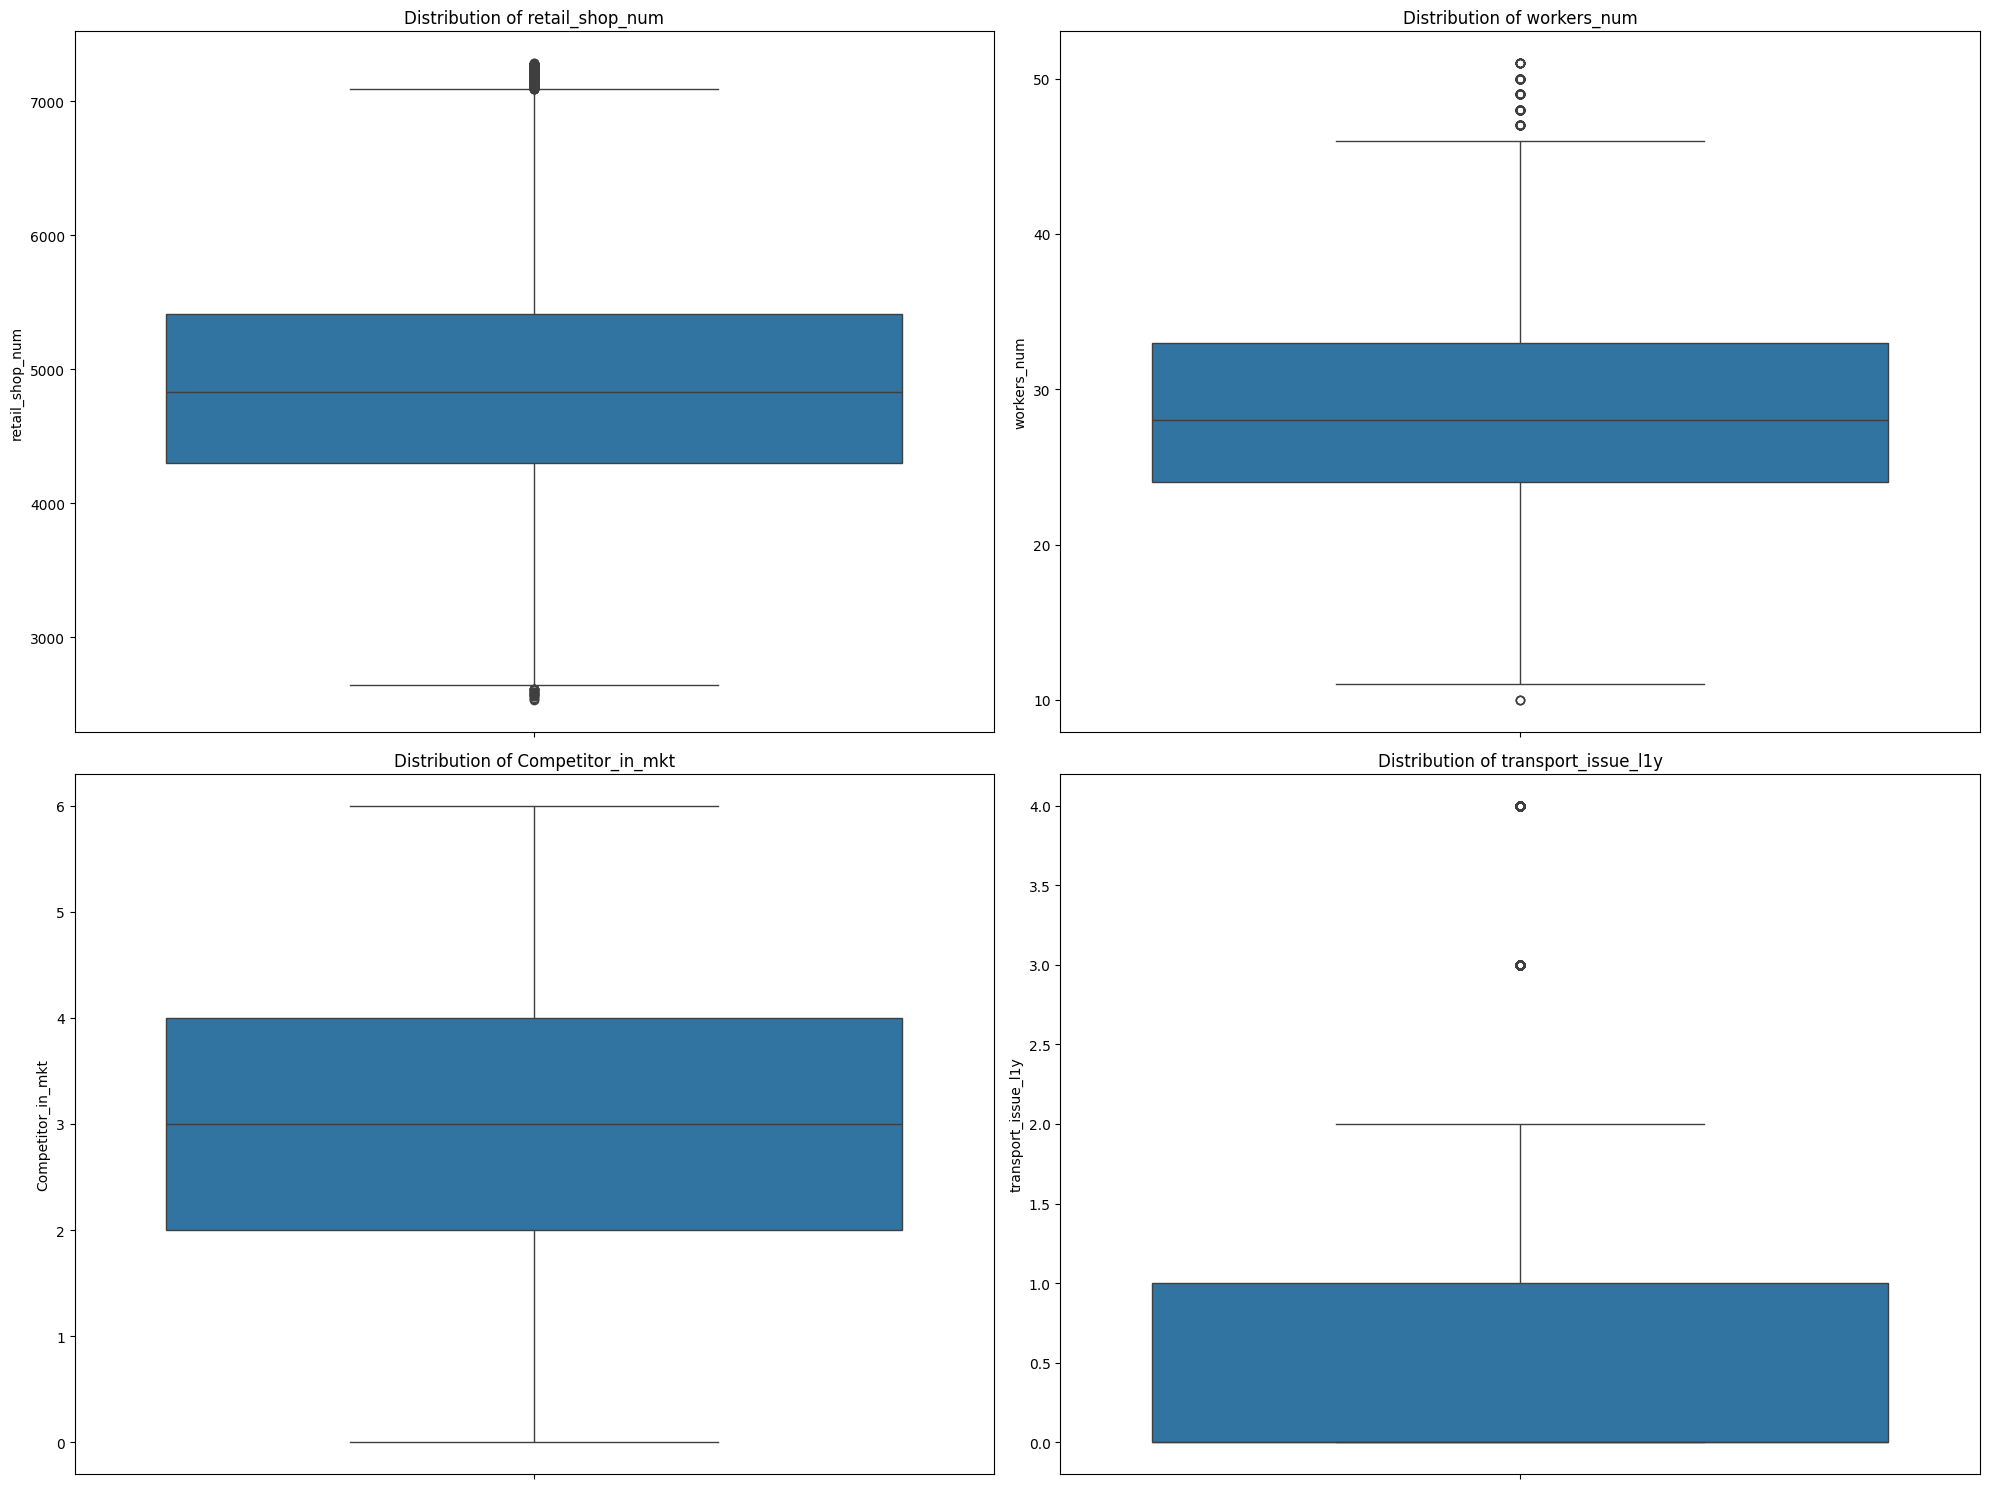

In [21]:


# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Corrected: It should be Q1 - 1.5*IQR for lower bound
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
                                                 
# columns to remove outliers using IQR
columns_iqr = ['retail_shop_num']
for column in columns_iqr:
    data_train = remove_outliers_iqr(data_train, column)
    
columns_zscore = ['workers_num', 'Competitor_in_mkt', 'transport_issue_l1y']

# Calculate  Z-scores for each in column in x
z_scores = zscore(data_train[columns_zscore])

#Define a threshold for outliers detection (e.g, 3 standard deviation)
threshold = 3

#Identify outliers using z_scores from x
outliers_zscore = (np.abs(z_scores) > threshold).any(axis=1)

#Remove outliers using Z_score from x
data_train = data_train[~outliers_zscore]

#Plot the distribution of all variable
plt.figure(figsize=(20,15))
columns = ['retail_shop_num','workers_num', 'Competitor_in_mkt', 'transport_issue_l1y']
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y= data_train[column])
    plt.title(f'Distribution of {column}')

#Adjust Layout
plt.tight_layout()
plt.show()
                    

Outliers are removed using IQR and z_method

The Z-score method involves standardizing the data and identifying how many standard deviations a data point is from the mean. The Interquartile Range (IQR) method is a commonly used technique for detecting outliers. This method is based on the statistical dispersion and spread of the data:specifically measuring the range between the first quartile(25th percentile)and the third quartile(75th percentile) of the datset.z_score is calculated based on the mean and standard deviation of the dataset, while IQR is calculate based on quaetiles



 ****Exploratory Data Analysis****

EDA was conducted to gain insights into the data understand the relationship between variables.summary statistics, data visualization,
and correlation analysiss were performed

In [22]:
#display basic information about the dataset
print("Dataset Info:")
print(data_train.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 15379 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 15379 non-null  object 
 1   WH_capacity_size              15379 non-null  object 
 2   zone                          15379 non-null  object 
 3   WH_regional_zone              15379 non-null  object 
 4   num_refill_req_l3m            15379 non-null  int64  
 5   transport_issue_l1y           15379 non-null  int64  
 6   Competitor_in_mkt             15379 non-null  int64  
 7   retail_shop_num               15379 non-null  int64  
 8   wh_owner_type                 15379 non-null  object 
 9   distributor_num               15379 non-null  int64  
 10  flood_impacted                15379 non-null  int64  
 11  flood_proof                   15379 non-null  int64  
 12  electric_supply               15379 non-null  int64

In [23]:
#Summary statistics for data_train
train_summary = data_train.describe()
train_summary

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000,15379.000000
mean,4.122505,0.720853,3.056571,4885.685935,42.531894,0.095715,0.057091,0.655114,163.407179,28.523246,2009.171142,17.187398,0.306067,3.489694,18.709019,22180.149945
std,2.607566,1.103460,1.047661,868.555294,16.087138,0.294209,0.232024,0.475347,62.704839,6.935316,5.524862,9.182617,0.460873,1.691116,8.602979,11648.920329
min,0.000000,0.000000,0.000000,2531.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2106.000000
25%,2.000000,0.000000,2.000000,4298.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2008.000000,10.000000,0.000000,2.000000,11.000000,13062.000000
50%,4.000000,0.000000,3.000000,4827.000000,42.000000,0.000000,0.000000,1.000000,163.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22108.000000
75%,6.000000,1.000000,4.000000,5415.500000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2010.000000,24.000000,1.000000,5.000000,26.000000,30108.000000
max,8.000000,4.000000,6.000000,7286.000000,70.000000,1.000000,1.000000,1.000000,271.000000,51.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [24]:
print(data_train.dtypes)

Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object


********Data Visualisation********

**Correlation Matrix**

Correlation is a statistical measure that describes the degree to which two variables change together. 
In other words, it quantifies the relationship between two variables. When two variables are correlated,
it means that changes in one variable tend to be associated with changes in the other variable.

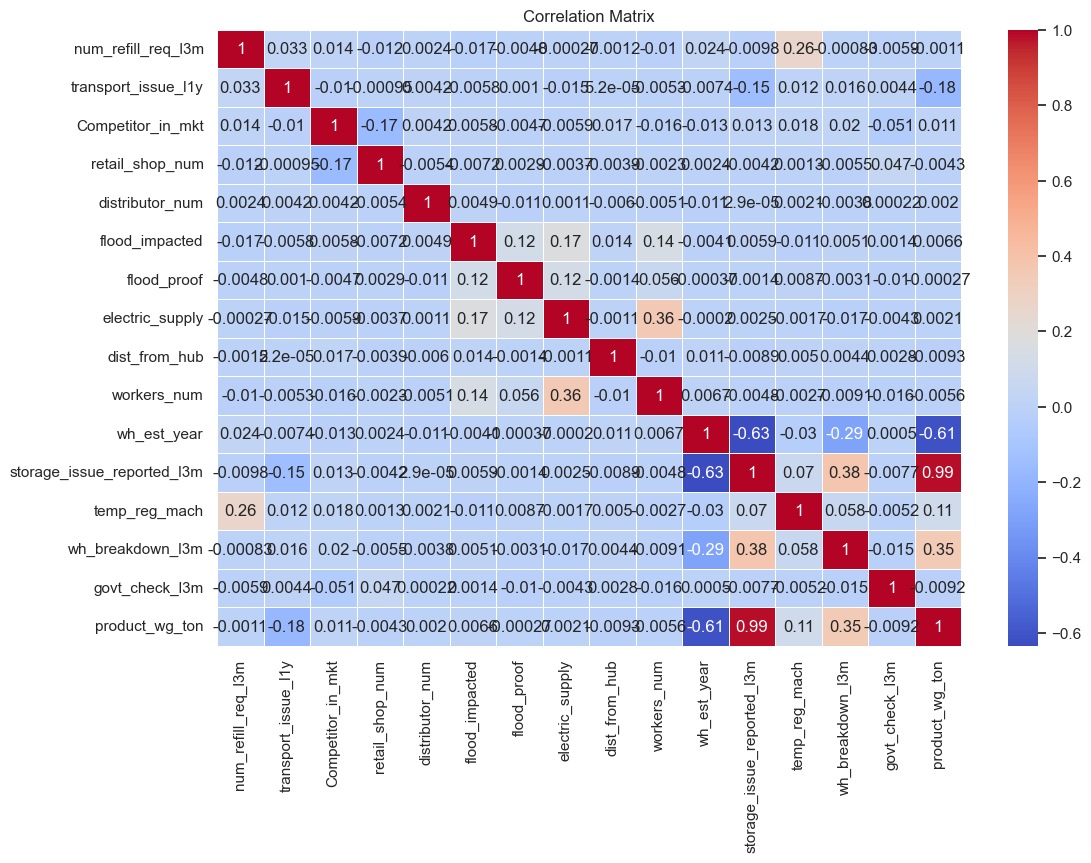

In [62]:

numerical_columns = data_train.select_dtypes(include='number').columns.tolist()

# Calculate the correlation matrix
correlation_matrix = data_train[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



**Histogram**

Histograms helps to visualize the distribution of numerical features.

In [ ]:
#plot histograms for visualize the distribution of numerical features.

numerical_features = ['transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','flood_impacted',
                    'flood_proof','electric_supply','dist_from_hub','workers_num','storage_issue_reported_l3m',
                     'temp_reg_mach','wh_breakdown_l3m','govt_check_l3m','product_wg_ton']


plt.figure(figsize=(15, 20))

# Loop through the list of numerical features to plot each one
for i, col in enumerate(numerical_features, 1):
    plt.figure(figsize=(8, 6)) # Adjust size as needed for each histogram
    sns.histplot(data_train[col], kde=True, color='skyblue')
    plt.title(col)
    plt.xlabel(col) # Optional: Adds a label to the x-axis
    plt.ylabel('Frequency') # Optional: Adds a label to the y-axis
    plt.show()




**Box polt**

Box plots are used to used to show distributions of numeric data values.

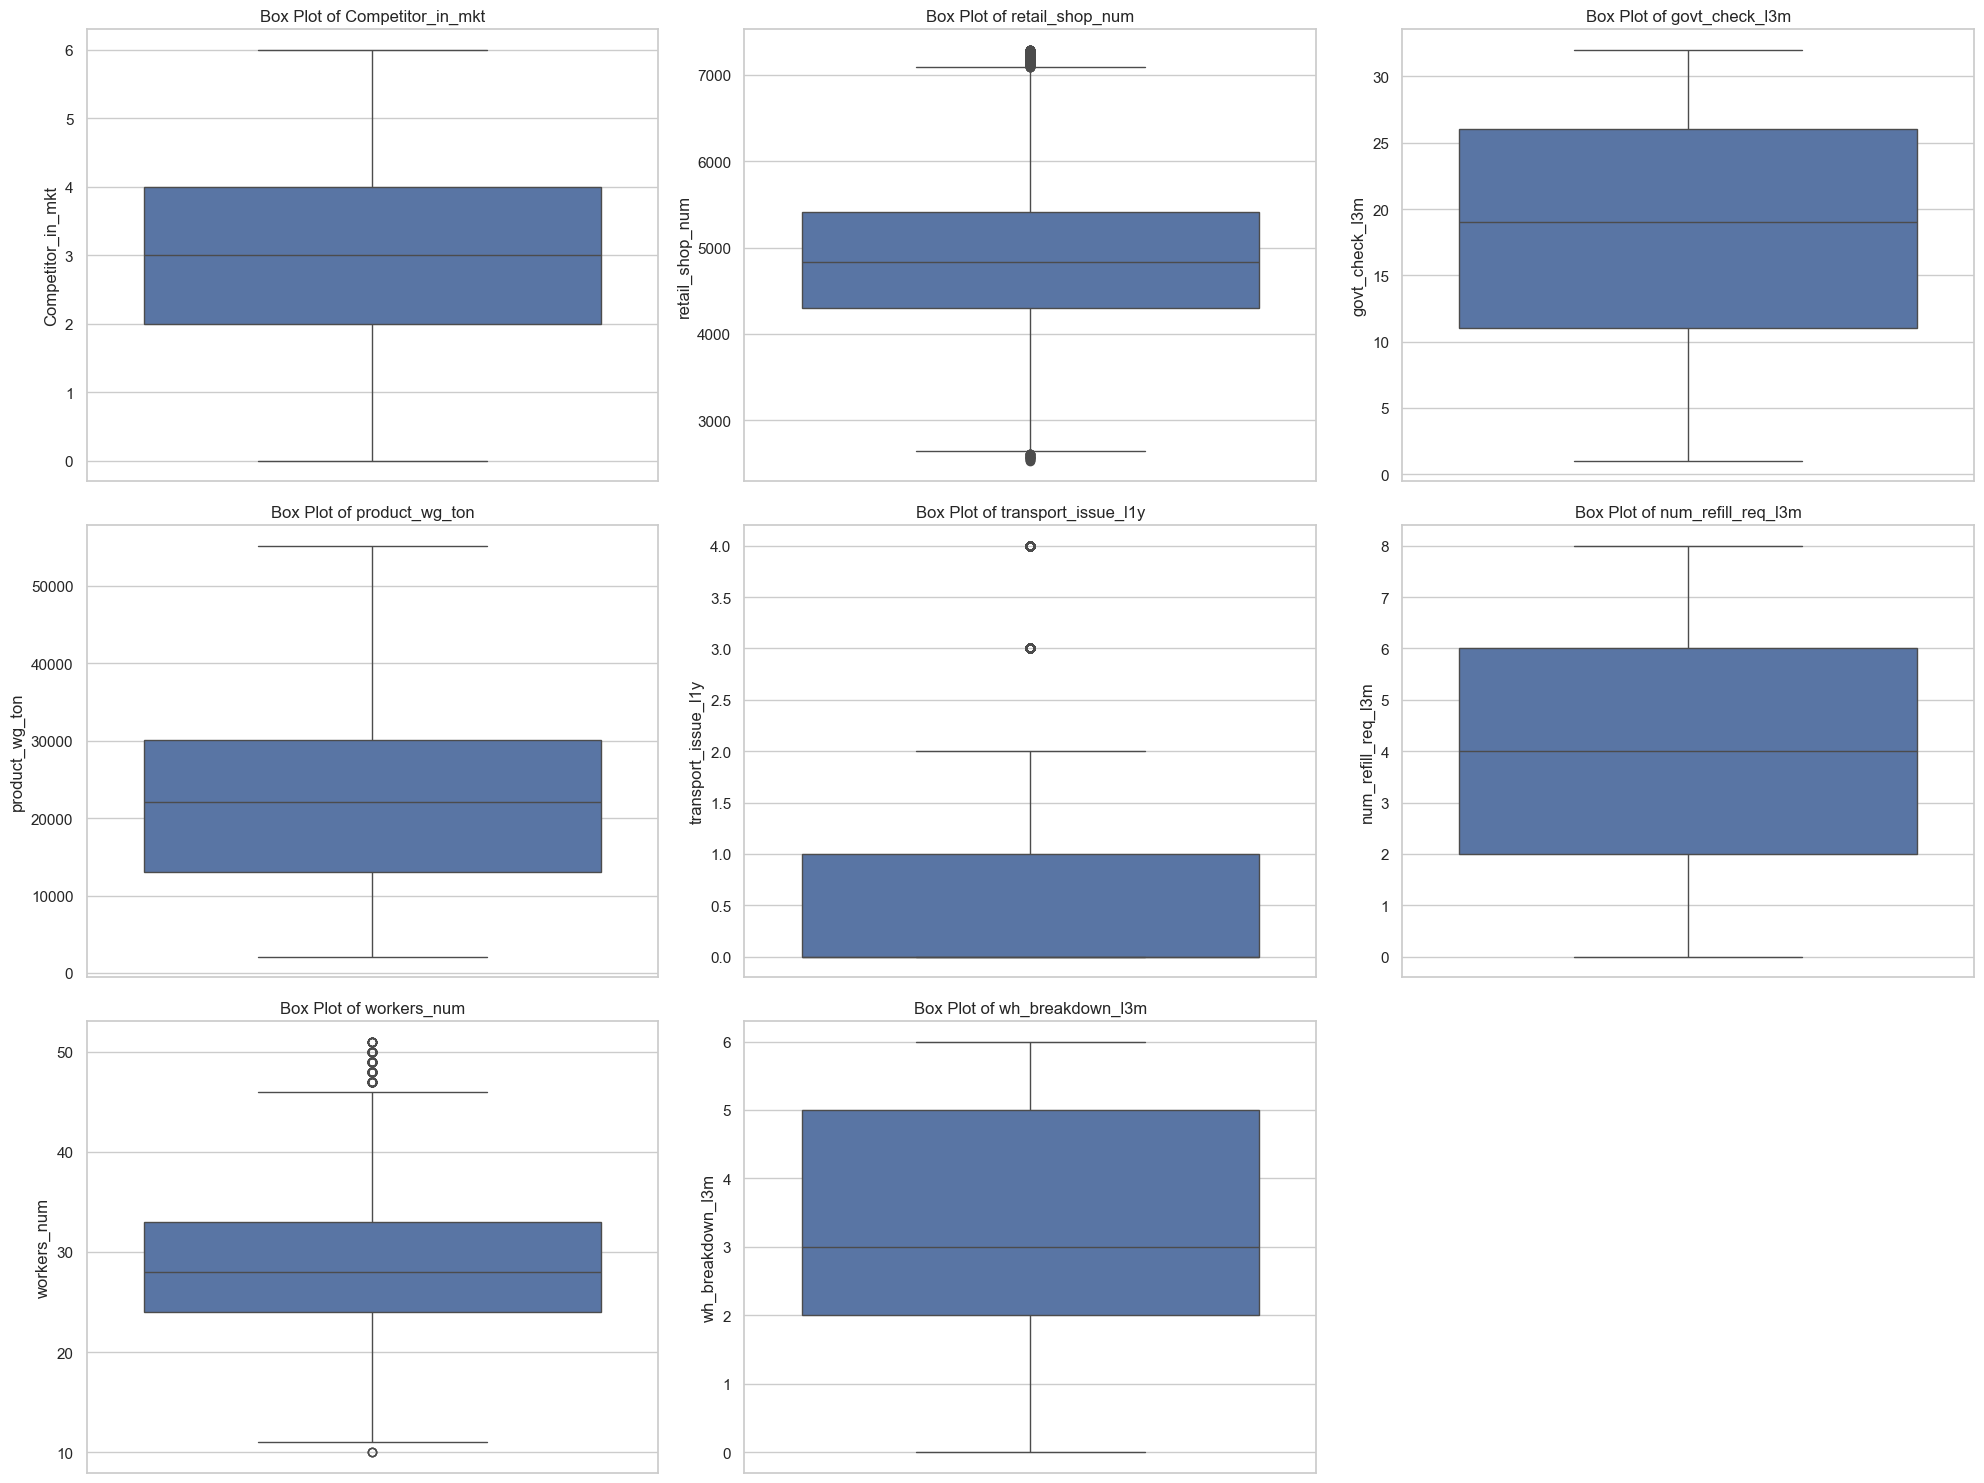

In [26]:
  # Assuming you want to plot all columns in the DataFrame

columns = data_train.columns  # Assuming you want to plot all columns in the DataFrame


#set the style of seaborn
sns.set(style="whitegrid")

#plot box plots for numerical features
plt.figure(figsize=(20, 15))
columns =['Competitor_in_mkt','retail_shop_num','govt_check_l3m','product_wg_ton','transport_issue_l1y','num_refill_req_l3m','workers_num','wh_breakdown_l3m']
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data_train[column])
    plt.title(f'Box Plot of {column}')
    
plt.tight_layout()
plt.show()

**Univariate analysis**

 *Data requires to analysis each variable separately.*

In [27]:


def univariateAnalysis_category(cat_columns, data):
    if cat_column in data.columns:
        print("Details of " + cat_column)
        print("----------------------------------------------------------")
        print(data[cat_column].value_counts())

        # Plotting the value counts
        plt.figure(figsize=(10, 6))  # You can parameterize the size if needed
        data[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column, color='skyblue')
        plt.xlabel('Categories')
        plt.ylabel('Frequency')
        plt.show()
        print("              ")



In [28]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15379 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 15379 non-null  object 
 1   WH_capacity_size              15379 non-null  object 
 2   zone                          15379 non-null  object 
 3   WH_regional_zone              15379 non-null  object 
 4   num_refill_req_l3m            15379 non-null  int64  
 5   transport_issue_l1y           15379 non-null  int64  
 6   Competitor_in_mkt             15379 non-null  int64  
 7   retail_shop_num               15379 non-null  int64  
 8   wh_owner_type                 15379 non-null  object 
 9   distributor_num               15379 non-null  int64  
 10  flood_impacted                15379 non-null  int64  
 11  flood_proof                   15379 non-null  int64  
 12  electric_supply               15379 non-null  int64  
 13  dist_f

In [29]:
df_cat = data_train.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns


['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

Details of Location_type
----------------------------------------------------------
Location_type
Rural    14133
Urban     1246
Name: count, dtype: int64


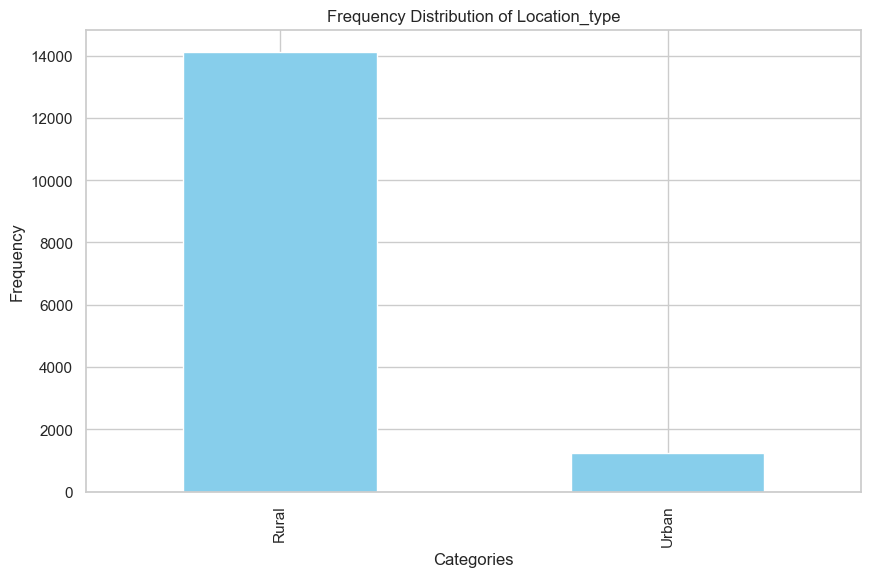

              
Details of WH_capacity_size
----------------------------------------------------------
WH_capacity_size
Large    6293
Mid      6179
Small    2907
Name: count, dtype: int64


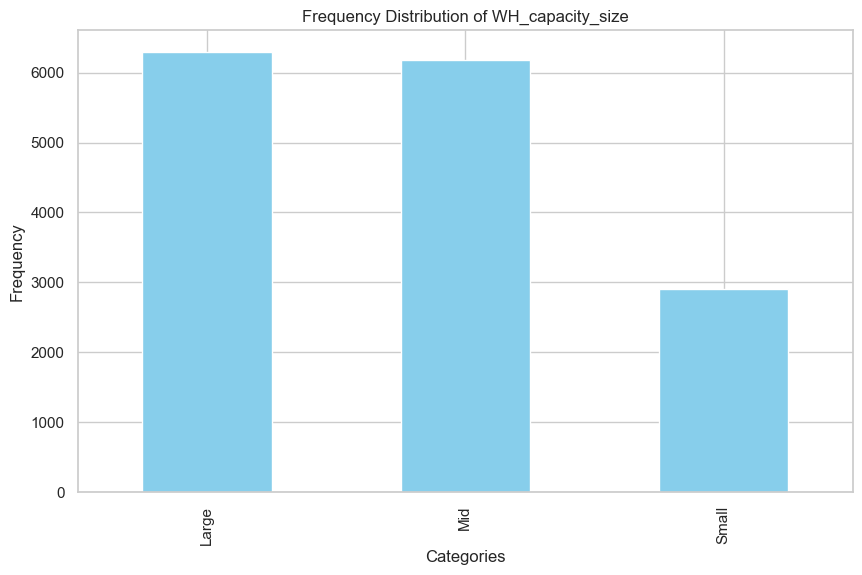

              
Details of zone
----------------------------------------------------------
zone
North    6356
West     4906
South    3919
East      198
Name: count, dtype: int64


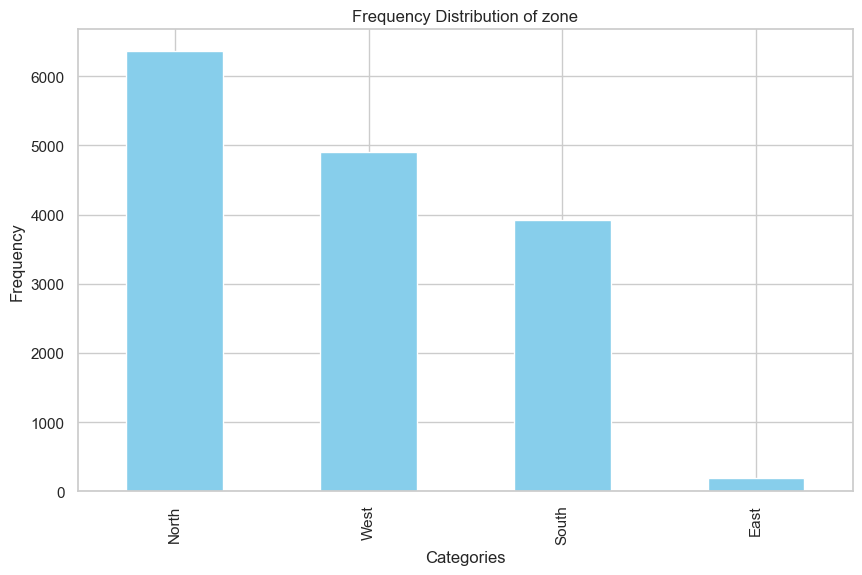

              
Details of WH_regional_zone
----------------------------------------------------------
WH_regional_zone
Zone 6    5141
Zone 5    2849
Zone 4    2519
Zone 2    1851
Zone 3    1809
Zone 1    1210
Name: count, dtype: int64


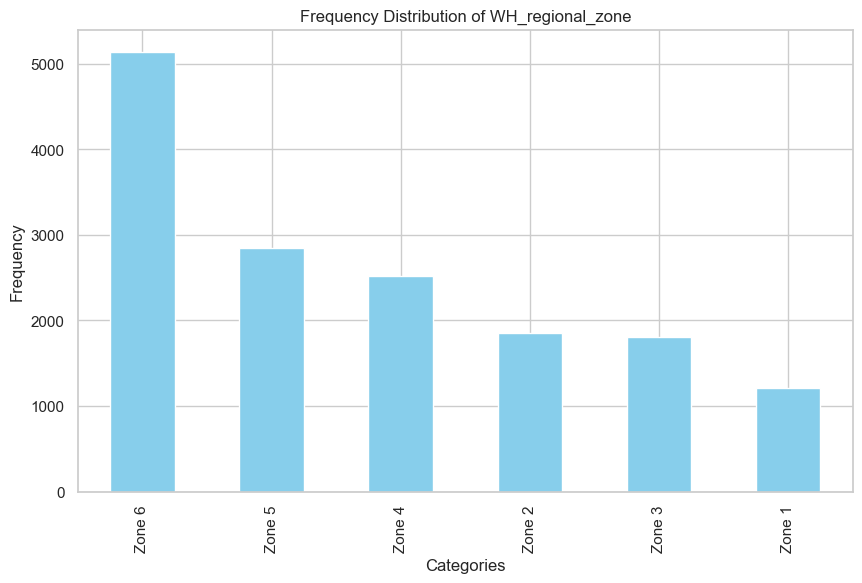

              
Details of wh_owner_type
----------------------------------------------------------
wh_owner_type
Company Owned    8292
Rented           7087
Name: count, dtype: int64


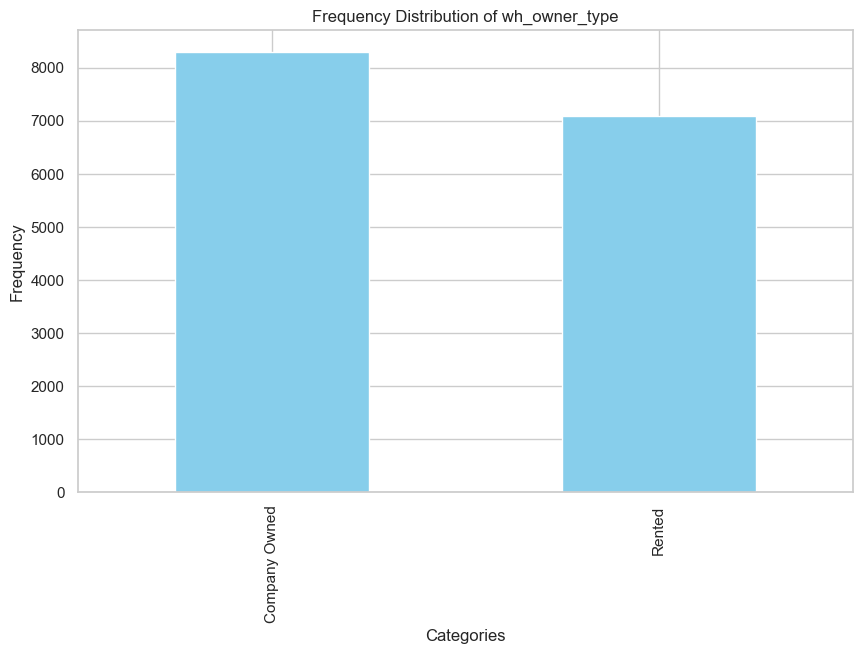

              
Details of approved_wh_govt_certificate
----------------------------------------------------------
approved_wh_govt_certificate
C     3928
B+    3028
B     2967
A     2902
A+    2554
Name: count, dtype: int64


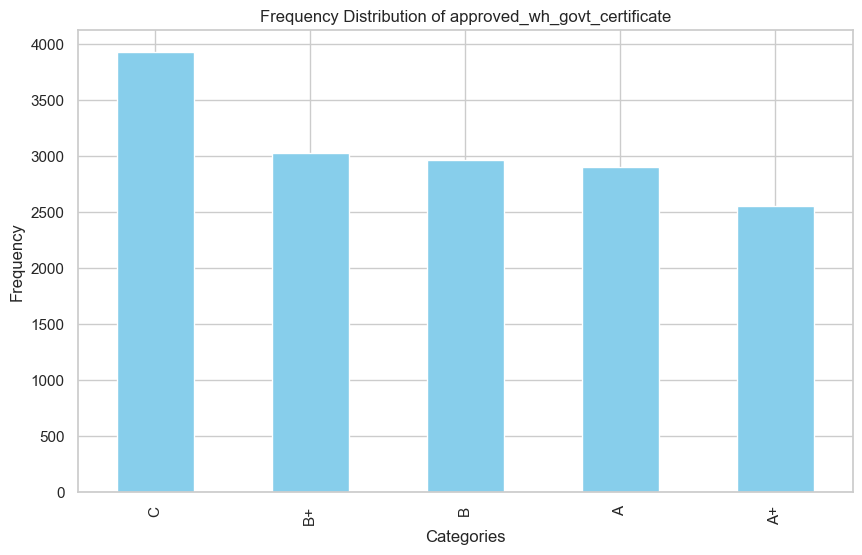

In [30]:
for cat_column in lstcatcolumns:
    univariateAnalysis_category(cat_column, data_train)




****Feature Engineering****

Extract and select relevant features from the data that will be usedd as input to the machine learning model.Features engineering can involve create
new features, transforming existing feature, or selecting the most important features.



**Encoding Categorical Vaalues**

Categorical variables were encoded using one-hot encoding to make them suitable for machin learing models

**One_Hot_Encoding**

The machine learning technique that encodes categorical data into numerical ones

In [31]:
# Encode categorical variables (One-Hot Encoding)
One_columns_to_encode = ['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type']

# Define object by calling class
One_encoder = OneHotEncoder(sparse_output=False, drop="first")

# Using one-hot encoding
One_encoded_data_train = One_encoder.fit_transform(data_train[One_columns_to_encode])

# Get feature names
feature_names = One_encoder.get_feature_names_out(input_features=One_columns_to_encode)

# Convert encoded data to DataFrame
One_encoded_data_train = pd.DataFrame(One_encoded_data_train, columns=feature_names)



**Label encoder**

Label enconding is a technique used in machine learning and data analysis to convert categorical variables into numerical format.

In [32]:


LB_columns_to_encode = ["WH_capacity_size", "approved_wh_govt_certificate"]

label_encoders = {}

LE_encoded_data_train = {}

for column in LB_columns_to_encode:
    label_encoders[column] = LabelEncoder()
    LE_encoded_data_train[column] = label_encoders[column].fit_transform(data_train[column])

LE_encoded_data_train_dataframe = pd.DataFrame(LE_encoded_data_train)

columns_to_drop = ['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type','WH_capacity_size', 'approved_wh_govt_certificate']

data_train_encoded = pd.concat([data_train.drop(columns=One_columns_to_encode+LB_columns_to_encode)], axis=1)
data_train_encoded.head(10)


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,29.0,2009.0,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,31.0,2009.0,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,37.0,2009.0,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,21.0,2009.0,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071
5,8,0,2,5053,37,0,0,1,152,35.0,2009.0,23,1,3,3,32134
6,8,0,4,4449,38,0,0,1,77,27.0,2010.0,24,0,3,6,30142
7,1,0,4,7183,45,0,0,0,241,23.0,2009.0,18,0,6,24,24093
8,8,1,4,5381,42,0,0,1,124,22.0,2013.0,13,1,5,2,18082
9,4,3,3,3869,35,0,0,0,78,43.0,2009.0,6,0,6,2,7130


**Data Splitting**

In [33]:
#print the shapes of the resulting sets
print("X_train shape:",data_train.shape)
print("y_train shape:",data_train.shape)


X_train shape: (15379, 22)
y_train shape: (15379, 22)


**Feature Scaling**

In [34]:

# Assuming train_data and test_data contain encoded numerical features

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
train_scaled_data = scaler.fit_transform(data_train.select_dtypes(include=['number']))
test_scaled_data = scaler.transform(data_test.select_dtypes(include=['number']))

# Convert scaled arrays back to DataFrames
train_scaled_df = pd.DataFrame(train_scaled_data, columns=data_train.select_dtypes(include=['number']).columns)
test_scaled_df = pd.DataFrame(test_scaled_data, columns=data_test.select_dtypes(include=['number']).columns)


In [35]:
#Combining train and test data sets
total_data = pd.concat([train_scaled_df,test_scaled_df])
total_data.shape

(20908, 16)

******Machine Learning Modeling******

Machine learning is a field of artifical intelligence(AI) that focuse on developing algorithms and techniques that enable computrer to learn from 
and make prediction or decisions based on data.

Common Techiques

1.Regression

2.Classification

3.Clustering

4.Dismensionality Reduction

5.Neural Networks

In [36]:


# Assign features to X and target variable to y
X = total_data.drop(['product_wg_ton'],axis=1)#features
y = total_data['product_wg_ton']#target


# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_test


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m
6705,0.336530,-0.653287,-0.053999,-0.295542,0.215590,-0.32534,-0.246064,0.725570,-0.325459,0.501328,0.512040,0.197401,-0.664124,1.484457,0.266310
4622,-1.581029,-0.653287,0.900540,1.322140,-1.462824,-0.32534,-0.246064,0.725570,1.030143,-0.796420,0.150028,0.741926,-0.664124,1.484457,1.312493
10201,-0.430494,-0.653287,-0.053999,0.956003,1.272369,-0.32534,-0.246064,0.725570,0.838764,2.231658,-2.022043,1.068641,-0.664124,-0.880923,-1.942300
13801,0.720042,2.971792,1.855078,0.449398,-0.779026,-0.32534,-0.246064,-1.378227,-0.660372,-0.219643,1.960087,-1.327268,-0.664124,-1.472268,1.312493
13756,1.103553,-0.653287,0.900540,-0.788330,-0.841190,-0.32534,-0.246064,0.725570,-0.963389,-0.652226,1.598075,-0.782743,-0.664124,-0.880923,-1.826057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,-0.814006,0.252982,0.900540,0.594471,-0.468209,-0.32534,-0.246064,0.725570,1.684021,-1.229003,-0.030978,-1.436173,-0.664124,-0.880923,-0.779874
8623,1.487065,-0.653287,-1.008537,1.773479,-0.654699,-0.32534,-0.246064,0.725570,0.647385,0.789716,-0.755001,0.959736,1.505743,-0.289578,-0.547389
14617,-1.197518,-0.653287,-1.963076,1.523630,-1.400661,-0.32534,-0.246064,0.725570,-0.118132,2.231658,-0.030978,0.633021,-0.664124,0.301767,-1.012359
12471,1.487065,2.065522,-0.053999,-0.601807,-0.592536,-0.32534,-0.246064,0.725570,-0.915544,0.501328,-0.030978,-0.347123,-0.664124,0.301767,-0.896116


 **Linear Regression Model**

In [37]:
model_LR = LinearRegression()
# Fit the Linear Regression model to the training data
model_LR.fit(X_train, y_train)


LinearRegression()

In [38]:


# Make predictions on the test set
y_pred_test = model_LR.predict(X_test)

# Measuring mean squared error and R^2 score
mse_LR = mean_squared_error(y_test, y_pred_test)
r2_LR = r2_score(y_test, y_pred_test)

print("Mean squared error of Linear Regression Model:", mse_LR, "\n")
print('R^2 score of Linear Regression Model:', r2_LR, "\n")


Mean squared error of Linear Regression Model: 0.022232215590555698 

R^2 score of Linear Regression Model: 0.9779297100903925 



**Decision Tree Model**

In [39]:
#Initialize and fit the decision tree Regressor model
model_DTR =DecisionTreeRegressor(random_state=42)
model_DTR.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [53]:


# Assuming X_train and y_train are already defined and preprocessed

# Initialize the Decision Tree Regressor
model_DIR = DecisionTreeRegressor()

# Fit the model to the training data
model_DIR.fit(X_train, y_train)

# Make prediction on the training set
y_pred_DTR = model_DIR.predict(X_test)

# Measuring mean squared error and R^2 score
mse_DTR = mean_squared_error(y_test, y_pred_DTR)
r2_DTR = r2_score(y_test, y_pred_DTR)

print("Mean squared error of Decision Tree Regression Model:", mse_DTR,"\n")
print('R^2 score of Decision Tree Regression Model:', r2_DTR,"\n")


Mean squared error of Decision Tree Regression Model: 0.026704650772383518 

R^2 score of Decision Tree Regression Model: 0.9734898493548391 



**RandomForestRegressor**

In [54]:
#Initialize and fit the radom forest Regressor model
model_RFR =RandomForestRegressor(random_state=42)
model_RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [55]:


# Make prediction on the training set
y_pred_train = model_RFR.predict(X_train)

# Measuring mean squared error and R^2 score
mse_RFR = mean_squared_error(y_train, y_pred_train)
r2_RFR = r2_score(y_train, y_pred_train)

print("Mean squared error of Random Forest Regression Model:", mse_RFR,"\n")
print('R^2 score of Random Forest regression Model:', r2_RFR, "\n")


Mean squared error of Random Forest Regression Model: 0.0020328941114623215 

R^2 score of Random Forest regression Model: 0.9979628054032387 



**Support Vector Machine Model**

In [56]:
# Initialize the Decision Tree Regressor
model_SVR = SVR()

# Fit the model to the training data
model_SVR.fit(X_train, y_train)

SVR()

In [57]:


# Make prediction on the training set
y_pred_SVR = model_SVR.predict(X_test)

# Measuring mean squared error and R^2 score
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
r2_SVR = r2_score(y_test, y_pred_SVR)

print("Mean squared error of Support Vector machine Model:", mse_SVR, "\n")
print('R^2 score of  Support Vector machine Model:', r2_SVR, "\n")


Mean squared error of Support Vector machine Model: 0.017936323127998536 

R^2 score of  Support Vector machine Model: 0.9821943139344381 



**Gradient Boosting Model**

In [58]:
# Initialize the Decision Tree Regressor
model_GBR= GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
model_GBR.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [59]:

# Make prediction on the training set
y_pred_train = model_GBR.predict(X_train)

# Measuring mean squared error and R^2 score
mse_GBR = mean_squared_error(y_train, y_pred_train)
r2_GBR = r2_score(y_train, y_pred_train)

print("Mean squared error ofGradient Boosting Regressor Model:", mse_GBR, "\n")
print('R^2 score of  Gradient Boosting Regressor Model:', r2_GBR, "\n")

Mean squared error ofGradient Boosting Regressor Model: 0.013152836530307957 

R^2 score of  Gradient Boosting Regressor Model: 0.9868193393052065 



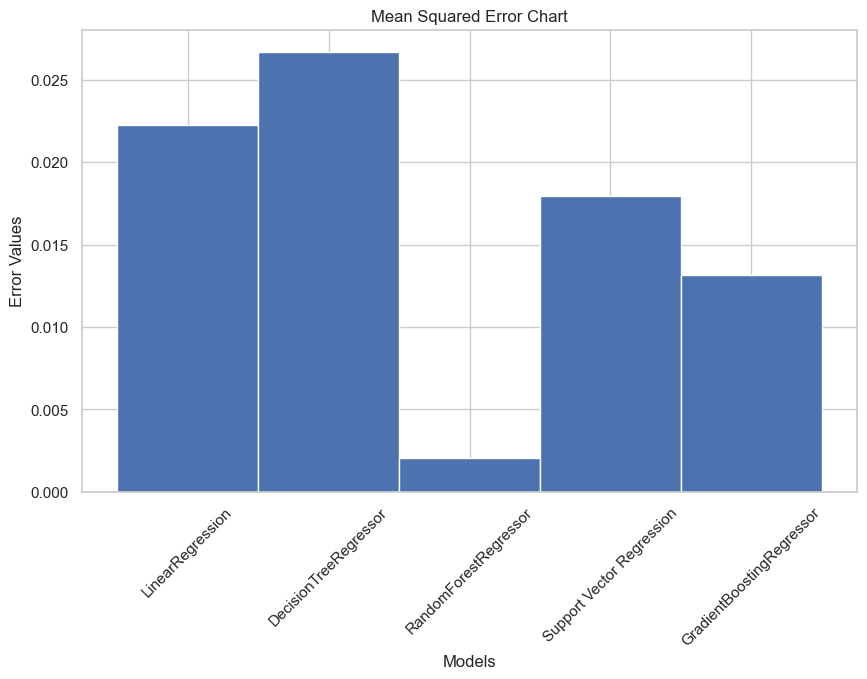

In [60]:


# Assuming LR, DTR, RFR, SVR, and GBR are models imported from scikit-learn or defined elsewhere in your code
mse_list = {
    "LinearRegression":mse_LR,
    "DecisionTreeRegressor":mse_DTR,
    "RandomForestRegressor":mse_RFR,
    "Support Vector Regression":mse_SVR,
    "GradientBoostingRegressor":mse_GBR
}


#Extract keys and values from the dictionary 
keys = list(mse_list.keys())
values = list(mse_list.values())


fig = plt.figure(figsize=(10, 6))
# Create bar chart
plt.bar(keys, values, width=1)
# Add labels and title
plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('Mean Squared Error Chart')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show plot
plt.show()


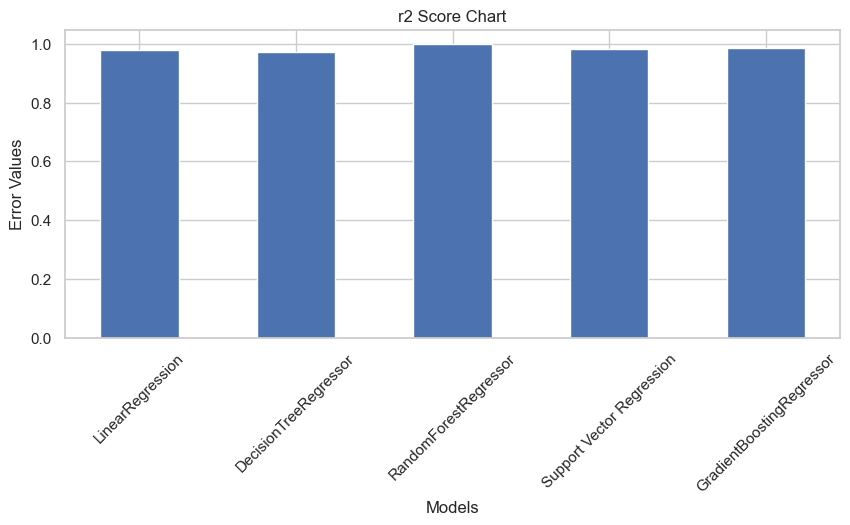

In [61]:
r2_list = {
    "LinearRegression":r2_LR,
    "DecisionTreeRegressor":r2_DTR,
    "RandomForestRegressor":r2_RFR,
    "Support Vector Regression":r2_SVR,
    "GradientBoostingRegressor":r2_GBR

}

#Extract keys and values from the dictionary 
keys = list(r2_list.keys())
values = list(r2_list.values())


fig = plt.figure(figsize=(10, 4))
# Create bar chart
plt.bar(keys, values, width=0.5)
# Add labels and title
plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('r2 Score Chart')


plt.xticks(rotation=45)


# Show plot
plt.show()


**Conclusion**

While considering mean squared error,**Random Forest Regression** model choosen to be the best model with a  MSE of
         **0.0020328941114623215**



While considering r2_score, **Gradient Boosting Regressor**choosen to be the best model with a  r2_score **0.9868193393052065** ,However,
Random Forest Regression model has a r2 score of**0.9979628054032387**




Therefore considering both error method,**Random Forest Regreesion model** has been choosen to be the best model suitable for the 
specific problem